In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [13]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [14]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
y_train = y_train.reshape(-1, )
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize=(3,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

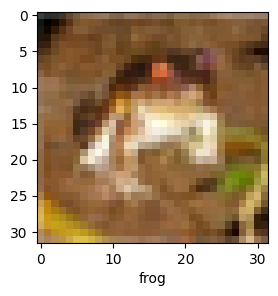

In [17]:
plot_sample(X_train, y_train, 0)

#### Normalization

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train[0].shape

(32, 32, 3)

#### ANN

In [21]:
model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(3000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 84s 53ms/step - loss: 1.8118 - accuracy: 0.3530
Epoch 2/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.6251 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.5423 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4827 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4306 - accuracy: 0.4994


In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.4671 - accuracy: 0.4717


[1.4670648574829102, 0.4717000126838684]

#### CNN

In [28]:
model = Sequential()
#cnn

model.add(Conv2D(filters=32, kernel_size = (3,3), activation='relu', input_shape = (32, 32, 3)))             # Conv
model.add(MaxPooling2D((2, 2)))                                                                              # Pooling

model.add(Conv2D(filters=64, kernel_size = (3,3), activation='relu'))                                        # Conv
model.add(MaxPooling2D((2, 2)))                                                                              # Pooling

#dense layers

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0192 - accuracy: 0.6434 - val_loss: 1.0342 - val_accuracy: 0.6434
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9227 - accuracy: 0.6802 - val_loss: 0.9729 - val_accuracy: 0.6601
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8557 - accuracy: 0.7020 - val_loss: 0.9225 - val_accuracy: 0.6813
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7960 - accuracy: 0.7241 - val_loss: 0.9329 - val_accuracy: 0.6808
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7465 - accuracy: 0.7379 - val_loss: 0.9099 - val_accuracy: 0.6887
Epoch 6/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.6988 - accuracy: 0.7548 - val_loss: 0.9080 - val_accuracy: 0.6924
Epoch 7/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.6612 - accuracy: 0.7665 - val_loss: 0.9184 -

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9268 - accuracy: 0.7015


[0.9268200397491455, 0.7014999985694885]